## **Programmation Neurones à deux couches**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split

### Fonction d'initialisation

$n_0$ nombres d'entré

$n_1$ nombre de neurones de la première couche

 $n_2$ nombre de neurones de la deuxième couche

In [54]:
def initialisation(n0, n1, n2):
    w1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    w2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)

    parametres = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
   }
    return parametres

paramts = initialisation(X.shape[0], 2, y.shape[0])
#paramts

### La forwade-propagation fonction

$$ Z^1 = W^1.X + b^1,~~~~~ A^1 = \frac{1}{1 + e^{-Z^1}},~~~~ W^1\in\mathbb R^{n_1\times n_0},~ X = (X_1,...,X_{n_0})^t, A^1\in R^{n_1\times 1}$$
$$ Z^2 = W^2.A^1 + b^2,~~~~~ A^2 = \frac{1}{1 + e^{-Z^2}},~~~~W^2\in\mathbb R^{n_2\times n_1},~ A^2\in R^{n_2\times 1}$$

In [55]:
def forwad_propagation(X, parametres, eps = 1e-15):
    w1 = parametres['w1']
    b1 = parametres['b1']
    w2 = parametres['w2']
    b2 = parametres['b2']

    Z1 = np.dot(w1 , X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = np.dot(w2 , A1) + b2 
    A2 = 1 / (1 + np.exp(-Z2))

    A1 = np.clip(A1, eps, 1 - eps)
    A2 = np.clip(A2, eps, 1 - eps)

    activations = {
        'A1' : A1,
        'A2' : A2
    }

    return activations

activation = forwad_propagation(X, paramts)
#activation

### Function du gradient : back-propagation

$$ dZ^2 = A^2 - y,~~~~ dW^2 = \frac{1}{m}dZ^2.{A^2}^T, ~~~~ db^2 = \frac{1}{m}\sum_{axe1}dZ^2 $$
$$ dZ^1 = {dW^2}^T.dZ^2A^1(1 - A^1), ~~~~ dW^1 = \frac{1}{m}dZ^1.X^T, ~~~~ db^1 = \frac{1}{m}\sum_{axe1}dZ^1 $$

In [56]:
def back_propagation(X, y, activation, parametres):
    A1 = activation['A1']
    A2 = activation['A2']
    w2 = parametres['w2']

    dZ2 = A2 - y
    dw2 = 1 / len(y) * np.dot(dZ2 , A1.T)
    db2 = 1 / len(y) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(w2.T , dZ2) * A1 * (1 - A1)
    dw1 = 1 / len(y) * np.dot(dZ1 , X.T)
    db1 = 1 / len(y) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dw1' : dw1, 
        'db1' : db1,
        'dw2' : dw2,
        'db2' : db2
    }

    return gradients

    # Mise à jour des paramètres
def update(parametres, gradients, learning_rate = 0.01):
    w1 = parametres['w1']
    b1 = parametres['b1']
    w2 = parametres['w2']
    b2 = parametres['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    paramts = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    }

    return paramts

gradients = back_propagation(X, y, activation, paramts)
update_param = update(paramts, gradients)
#update_param

### Fonction de prediction

In [57]:
def predict(X, parametres):
    activations = forwad_propagation(X, parametres)
    A2 = activations['A2']

    return A2 >= 0.5

predict(X, paramts).shape


(1, 100)

## Function neural Network

In [58]:
def Log_loss(A, y):
    return - 1 / len(y) * sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [59]:
from sklearn.metrics import log_loss, accuracy_score
from tqdm import tqdm

def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):
    
    # initiation w, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):

        activations = forwad_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(parametres, gradients, learning_rate)

        if i %10 ==0:
            #train
            y_prob = activations['A2']
            train_loss.append(log_loss(y_train.flatten(), y_prob.flatten()))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)


    plt.figure(figsize=(20,5))
# Representation de la courbe de la fonction coût
    plt.subplot(1,3,1)    
    plt.plot(train_loss, label = 'train loss')
    plt.legend()
# Representation de la courbe de l'accuracy
    plt.subplot(1,3,2)    
    plt.plot(train_acc, label = 'train accuracy')
    plt.legend()
# Representation de la courbe de la fonction de décision
    plt.subplot(1,3,3)
    x_min, x_max = X_train[0, :].min() - 0.5, X_train[0, :].max()
    y_min, y_max = X_train[1, :].min() - 0.5, X_train[1, :].max()
    h = 100
    x_lim = np.linspace(x_min, x_max, h)
    y_lim = np.linspace(y_min, y_max, h)
    xx, yy = np.meshgrid(x_lim, y_lim)
    grid_points = np.c_[xx.ravel(), yy.ravel()].T
    Z = predict(grid_points, parametres)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap = plt.cm.Greens, alpha = 0.8)
    plt.scatter(X_train.T[:, 0], X_train.T[:, 1], c = y_train.flatten(), cmap = 'summer', edgecolors = 'k')
    plt.contour(xx, yy, Z, levels = [0.5], colors = 'red')
    
    plt.show()

    return parametres

### Essai de l'algo

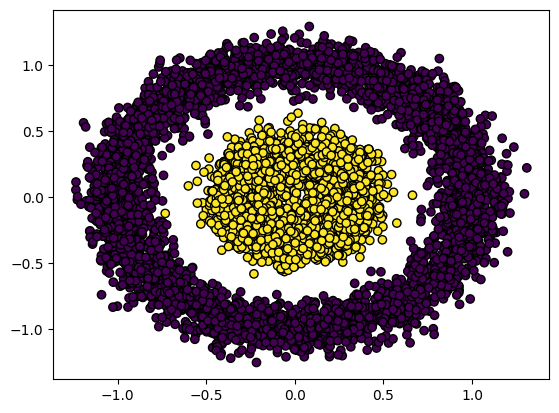

In [69]:
X, y = make_circles(n_samples=10000,noise=0.1, factor=0.3, random_state=0 )

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.reshape((X_train.shape[0],1)).T, y_test.reshape((X_test.shape[0],1)).T

plt.scatter(X_train[0, :], X_train[1, :], c=y_train, edgecolors='k')
plt.show()

100%|██████████| 300/300 [00:01<00:00, 167.78it/s]


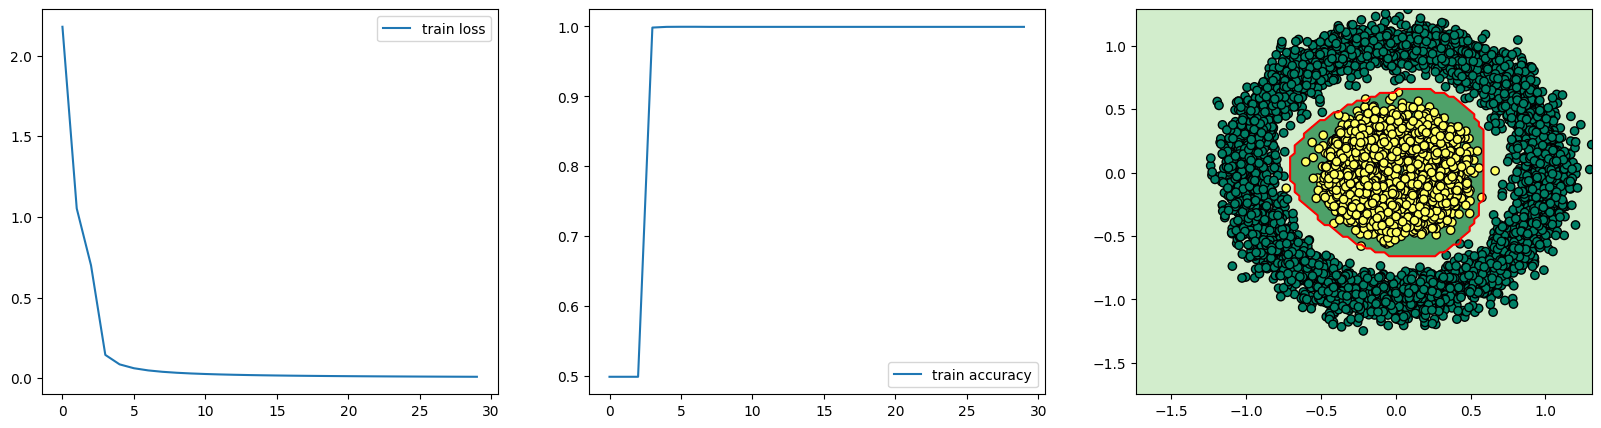

Accuracy train:  0.9995
Accuracy test:  0.9995


In [68]:
parametres = neural_network(X_train, y_train, n1=32, learning_rate=0.001, n_iter=300)

y_pred_train = predict(X_train, parametres)
y_pred_test = predict(X_test, parametres)

print("Accuracy train: ", accuracy_score(y_train.flatten(), y_pred_train.flatten()))
print("Accuracy test: ", accuracy_score(y_test.flatten(), y_pred_test.flatten()))